In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#Description
1. Age: The age of the patient.
2. Sex: The gender of the patient (typically coded as 0 for female and 1 for male).
3. Chest pain type: Describes the type of chest pain experienced by the patient. This could be categorized into different types such as typical angina, atypical angina, non-anginal pain, or asymptomatic.
4. BP: Blood pressure of the patient.
5. Cholesterol: Cholesterol level in the patient's blood.
6. FBS over 120: Fasting blood sugar level over 120 mg/dL, indicating potential hyperglycemia.
7. EKG results: Electrocardiogram (EKG) results, which record the electrical activity of the heart. This could include normal results or abnormalities such as ST-T wave changes, left ventricular hypertrophy, or arrhythmias.
8. Max HR: Maximum heart rate achieved during an exercise stress test.
9. Exercise angina: Whether the patient experienced angina (chest pain or discomfort due to reduced blood flow to the heart muscle) during exercise.
10. ST depression: Depression (downward displacement) of the ST segment on an electrocardiogram, which can indicate myocardial ischemia (insufficient blood flow to the heart muscle).
11. Slope of ST: The slope of the ST segment on an electrocardiogram during exercise. This can provide additional information about myocardial ischemia.
12. Number of vessels fluro: Number of major blood vessels (coronary arteries) showing fluoroscopy during a cardiac catheterization procedure.
13. Thallium: Results of a thallium stress test, which is a nuclear imaging test used to evaluate blood flow to the heart during exercise and at rest.
14. Heart Disease: The target variable, indicating the presence or absence of heart disease. This could be coded as binary values, for example, 0 for absence and 1 for presence of heart disease.

In [ ]:
hd = pd.read_csv("/content/drive/MyDrive/Machine Learning Datasets/Heart_Disease_Prediction.csv")
hd

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
hd.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
hd.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [ ]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
hd.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
hd.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
hd.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
hd['Age'].value_counts()

54    16
58    15
51    12
57    12
59    12
60    12
52    11
62    11
44    10
41     9
56     9
64     9
65     8
67     8
42     8
53     7
63     7
61     7
46     7
45     7
48     7
43     7
50     7
55     6
66     6
49     5
70     4
47     4
40     3
71     3
39     3
35     3
69     3
68     3
37     2
34     2
76     1
74     1
38     1
77     1
29     1
Name: Age, dtype: int64

In [ ]:
hd['Sex'].value_counts()

1    183
0     87
Name: Sex, dtype: int64

In [ ]:
hd['Chest pain type'].value_counts()

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [ ]:
hd['Cholesterol'].value_counts()

234    6
269    5
254    5
212    4
243    4
      ..
313    1
564    1
221    1
306    1
192    1
Name: Cholesterol, Length: 144, dtype: int64

In [ ]:
hd['Thallium'].value_counts()

3    152
7    104
6     14
Name: Thallium, dtype: int64

In [ ]:
hd.groupby('Age')['Cholesterol'].mean().sort_values(ascending = True).head()

Age
34    196.000000
40    196.333333
76    197.000000
29    204.000000
35    221.000000
Name: Cholesterol, dtype: float64

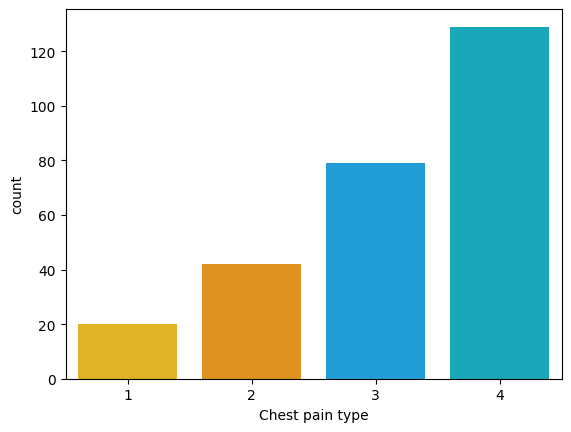

In [ ]:
sns.countplot(x = 'Chest pain type', data = hd, palette = ['#ffc107','#ff9800','#03a9f4','#00bcd4'])

plt.show()

<Axes: xlabel='Age', ylabel='Cholesterol'>

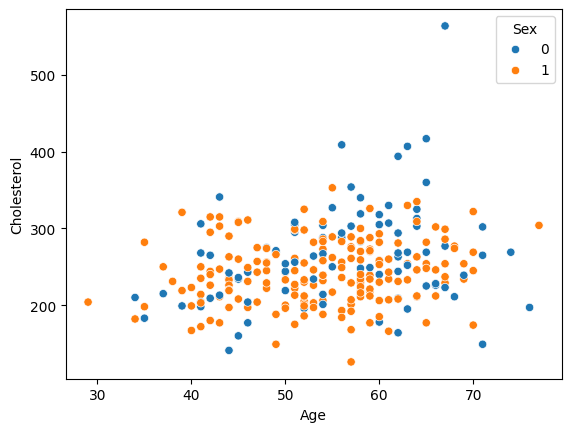

In [ ]:
sns.scatterplot(x = 'Age',y= 'Cholesterol',hue = 'Sex',data = hd)

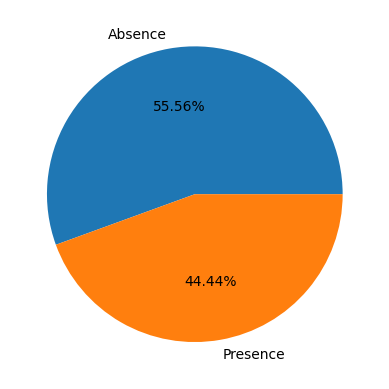

In [ ]:
HD = hd['Heart Disease'].value_counts()
plt.pie(HD, labels = HD.index, autopct = '%.2f%%')
plt.show()

<Axes: >

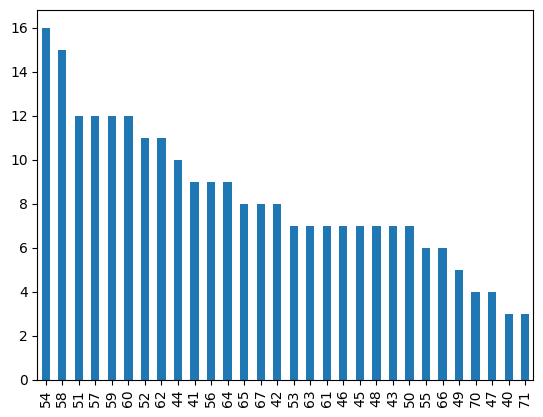

In [ ]:
hd['Age'].value_counts().head(30).plot.bar()

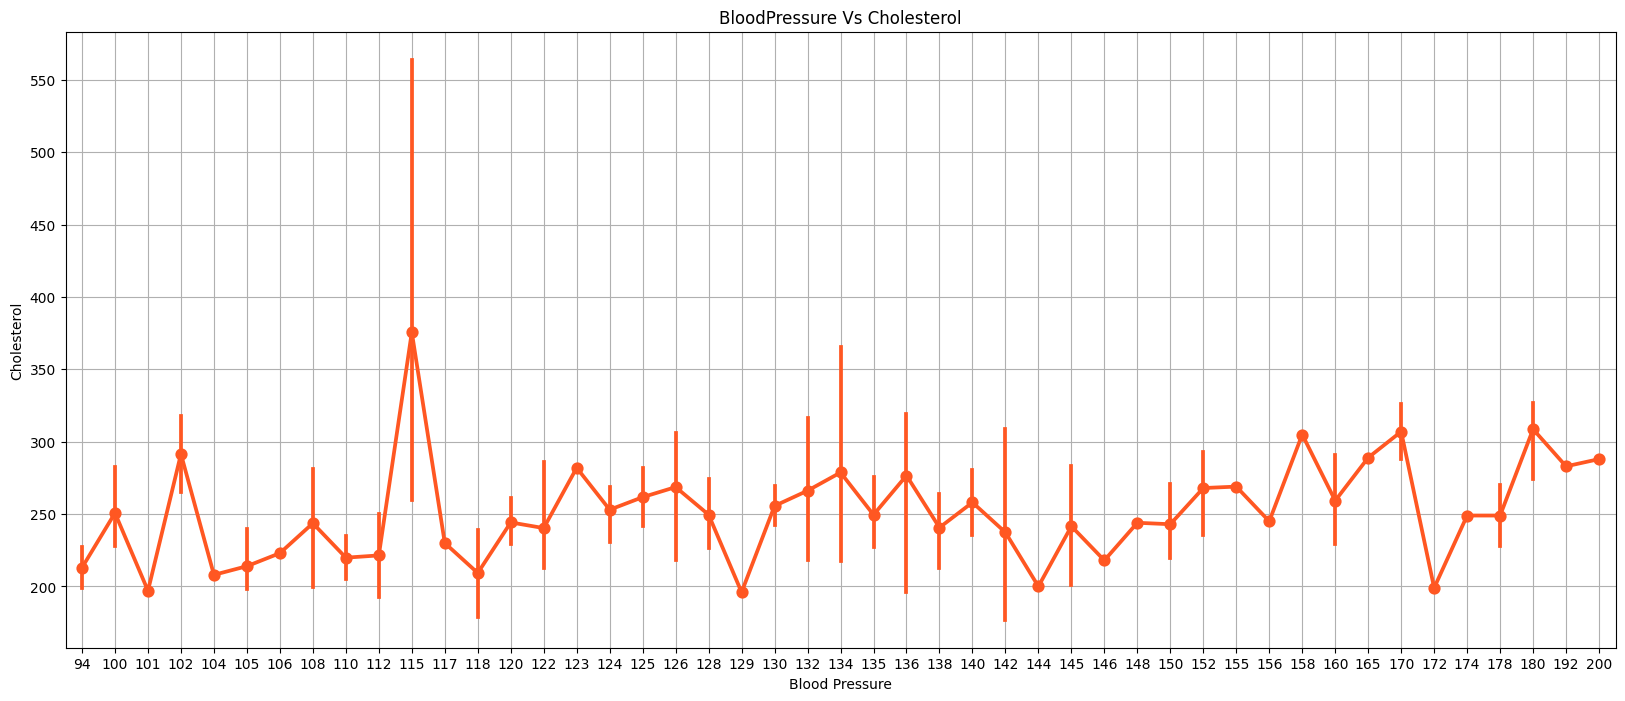

In [ ]:
plt.figure(figsize = (20, 8))

sns.pointplot(x = 'BP', y = 'Cholesterol',color = '#ff5722', data = hd)
plt.title("BloodPressure Vs Cholesterol")
plt.xlabel("Blood Pressure")
plt.ylabel("Cholesterol")
plt.grid(True)
plt.show()

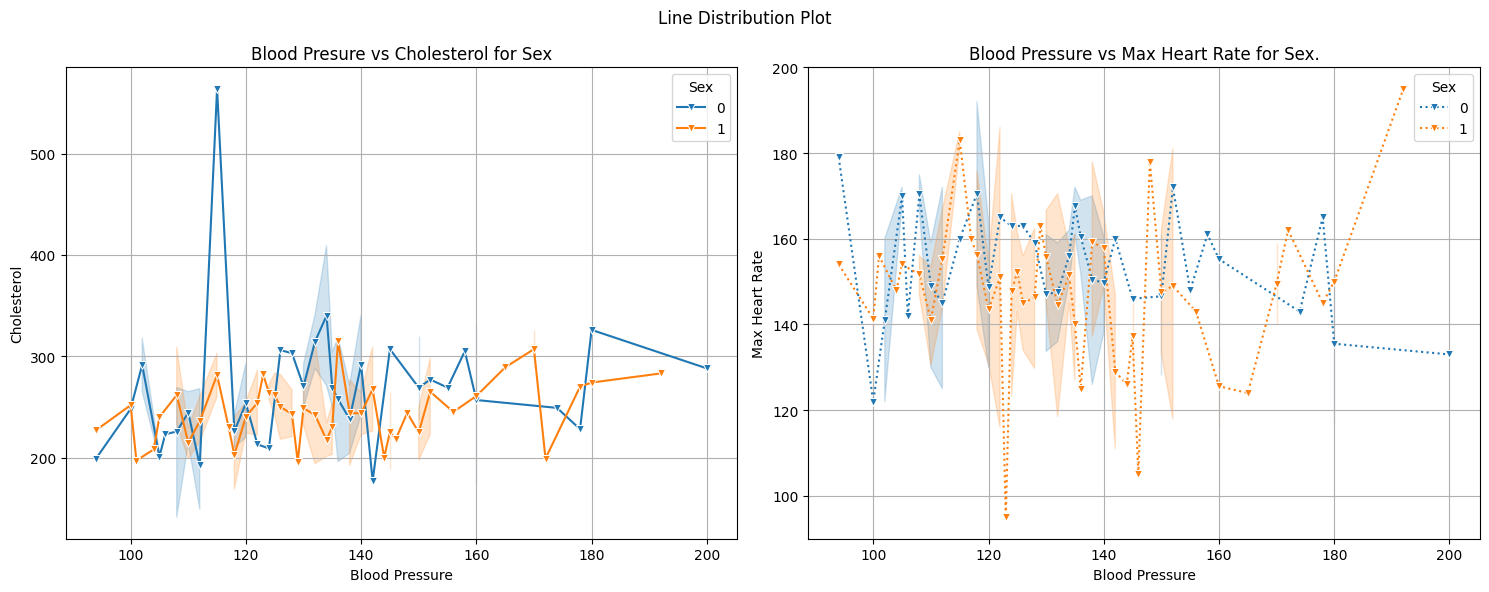

In [ ]:
#Line Plot
#0 --> Female, 1 --> Male
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.suptitle("Line Distribution Plot")
sns.lineplot(x = 'BP', y = 'Cholesterol',hue = 'Sex', marker = 'v',  data = hd)
plt.title("Blood Presure vs Cholesterol for Sex")
plt.xlabel("Blood Pressure")
plt.ylabel("Cholesterol")
plt.grid(True)
plt.tight_layout()

plt.subplot(1,2,2)
sns.lineplot(x = 'BP', y = 'Max HR', hue = 'Sex',  data = hd, linestyle = ":",marker = 'v', color = '#3f51b5')
plt.title("Blood Pressure vs Max Heart Rate for Sex.")
plt.xlabel("Blood Pressure")
plt.ylabel("Max Heart Rate")
plt.grid(True)
plt.tight_layout()

<Axes: ylabel='Chest pain type'>

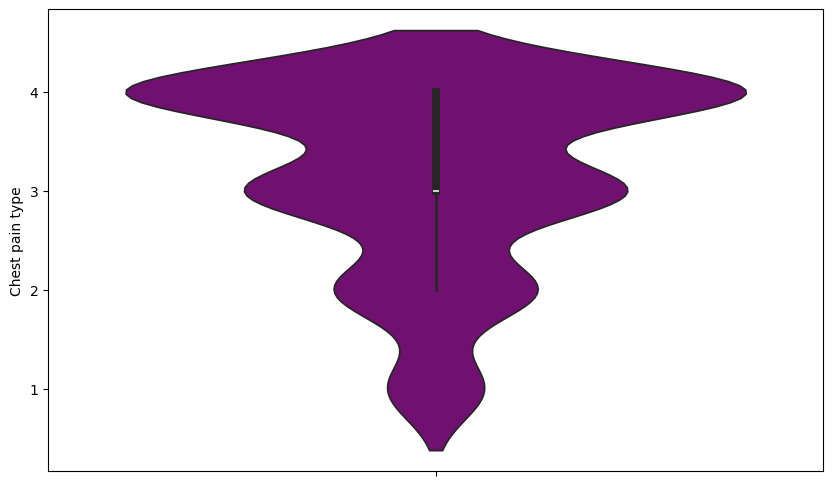

In [ ]:
plt.figure(figsize = (10, 6))
sns.violinplot(hd['Chest pain type'], color = 'purple')

<Axes: ylabel='Max HR'>

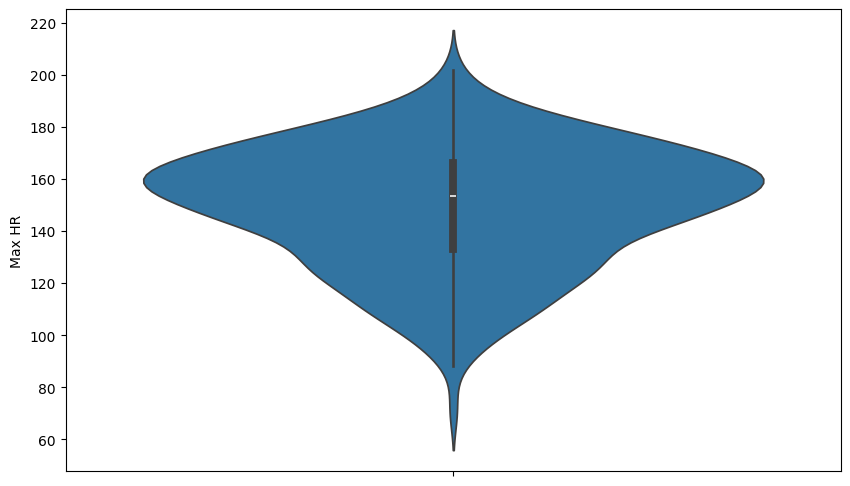

In [ ]:
plt.figure(figsize = (10, 6))
sns.violinplot(hd['Max HR'])

<Axes: xlabel='BP', ylabel='Cholesterol'>

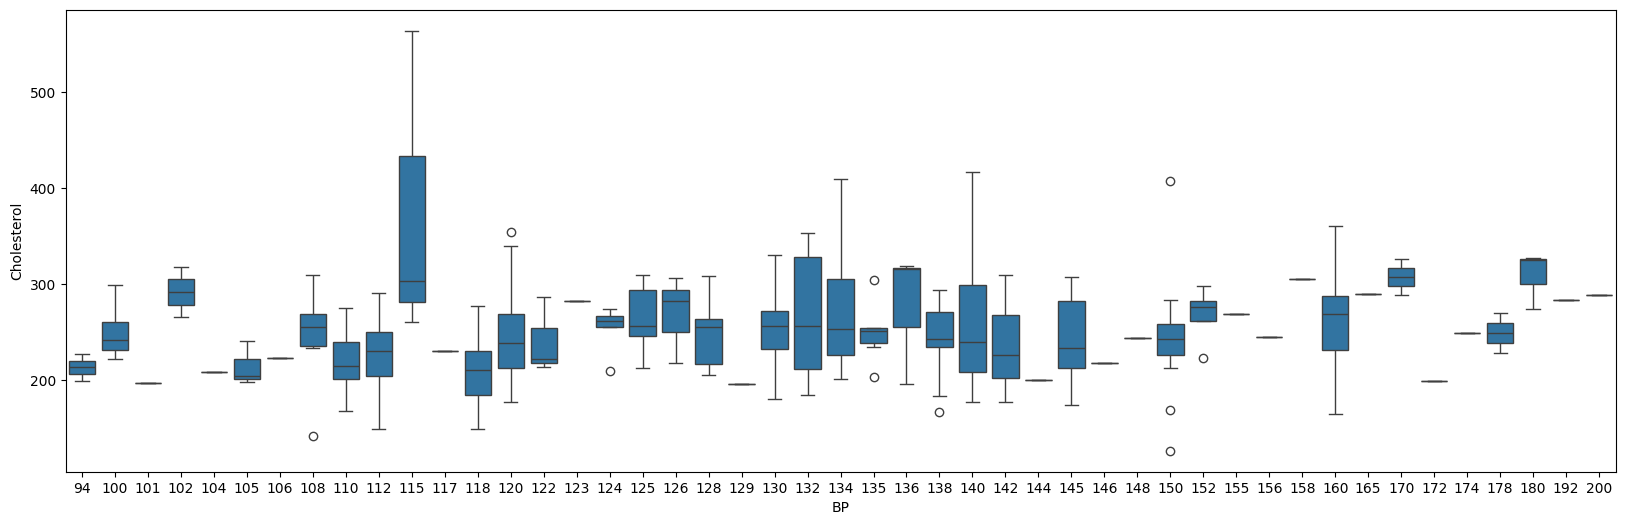

In [ ]:
plt.figure(figsize = (20, 6))
sns.boxplot(x = 'BP', y = 'Cholesterol',data = hd)

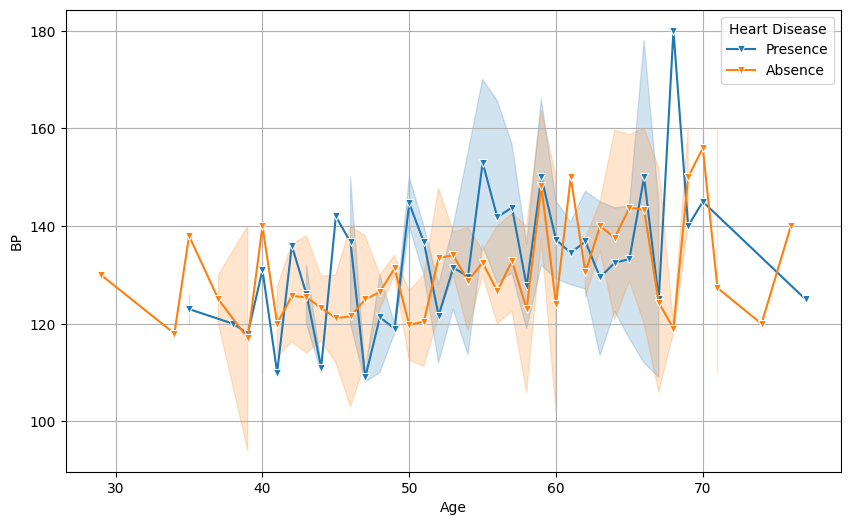

In [ ]:
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'Age', y = 'BP',hue = 'Heart Disease',marker = 'v', data = hd, color = '#8a4af3')
plt.grid(True)

In [ ]:
hd.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

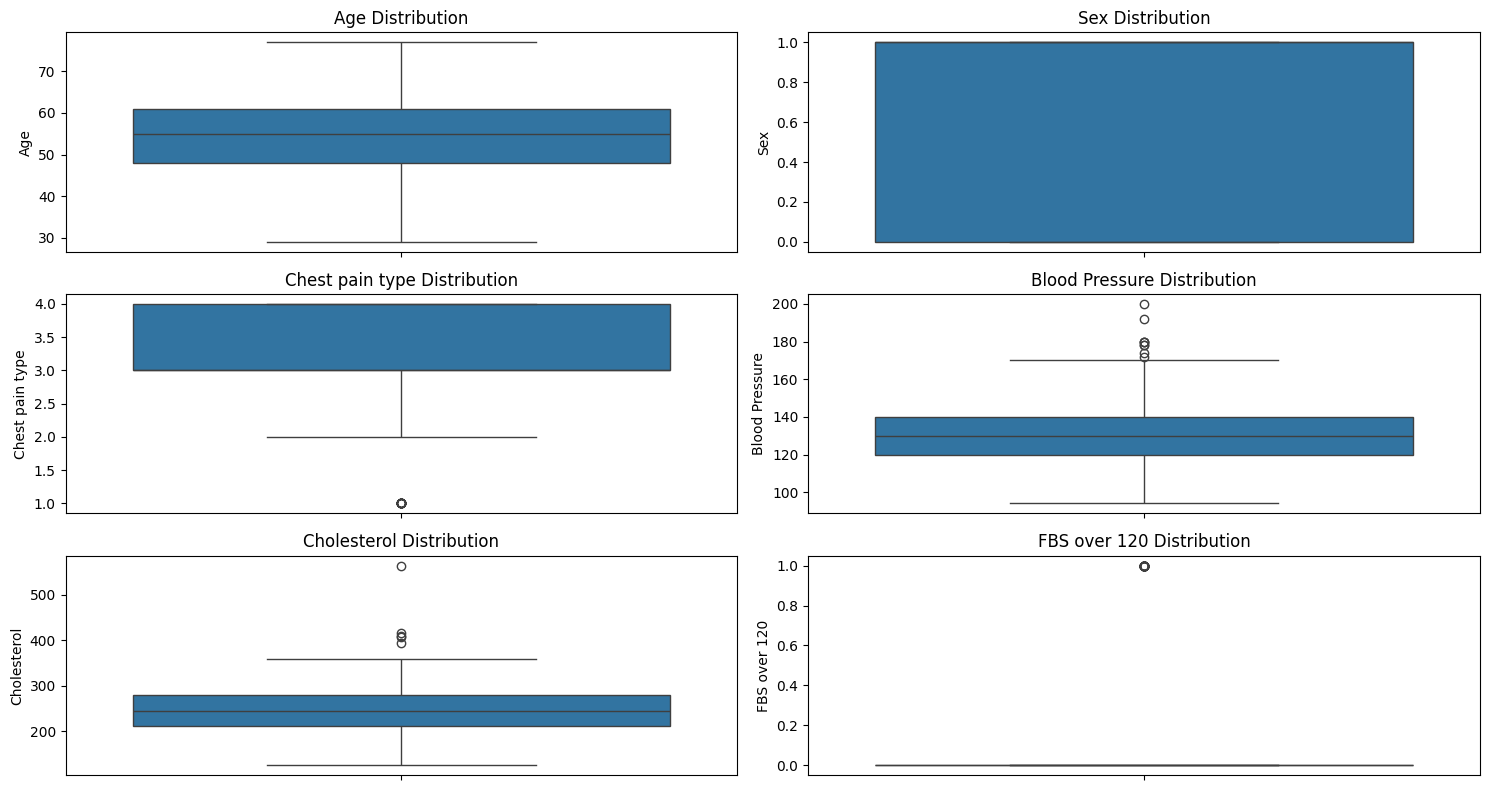

In [ ]:
plt.figure(figsize = (15, 8))

plt.subplot(3,2,1)
sns.boxplot(hd['Age'])
plt.title("Age Distribution")
plt.ylabel("Age")

plt.subplot(3,2,2)
sns.boxplot(hd['Sex'])
plt.title("Sex Distribution")
plt.ylabel("Sex")

plt.subplot(3,2,3)
sns.boxplot(hd['Chest pain type'])
plt.title("Chest pain type Distribution")
plt.ylabel("Chest pain type")

plt.subplot(3,2,4)
sns.boxplot(hd['BP'])
plt.title("Blood Pressure Distribution")
plt.ylabel("Blood Pressure")

plt.subplot(3,2,5)
sns.boxplot(hd['Cholesterol'])
plt.title("Cholesterol Distribution")
plt.ylabel("Cholesterol")

plt.subplot(3,2,6)
sns.boxplot(hd['FBS over 120'])
plt.title("FBS over 120 Distribution")
plt.ylabel("FBS over 120")
plt.tight_layout()


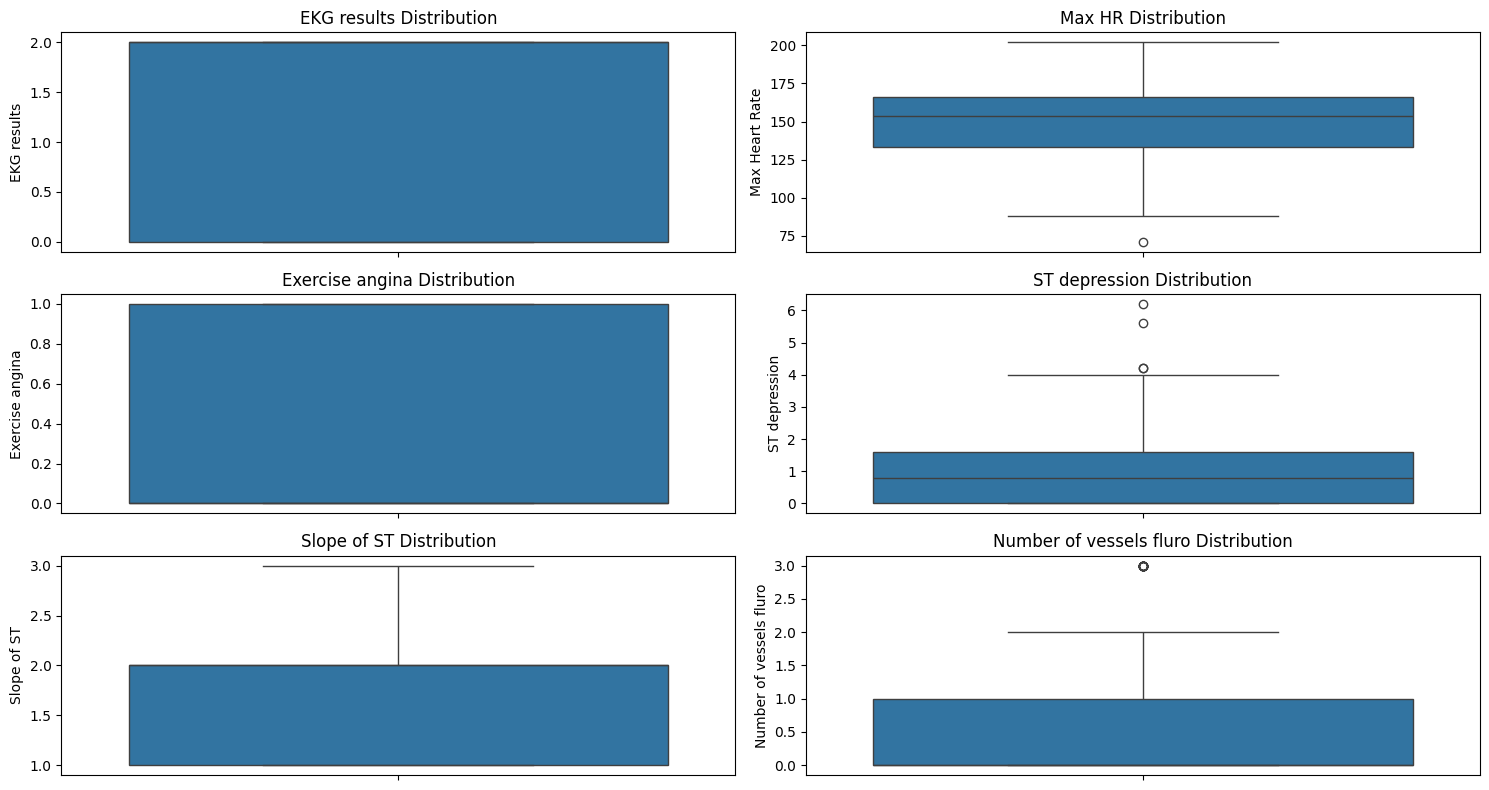

In [ ]:
plt.figure(figsize = (15, 8))

plt.subplot(3,2,1)
sns.boxplot(hd['EKG results'])
plt.title("EKG results Distribution")
plt.ylabel("EKG results")

plt.subplot(3,2,2)
sns.boxplot(hd['Max HR'])
plt.title("Max HR Distribution")
plt.ylabel("Max Heart Rate")


plt.subplot(3,2,3)
sns.boxplot(hd['Exercise angina'])
plt.title("Exercise angina Distribution")
plt.ylabel("Exercise angina")

plt.subplot(3,2,4)
sns.boxplot(hd['ST depression'])
plt.title("ST depression Distribution")
plt.ylabel("ST depression")

plt.subplot(3,2,5)
sns.boxplot(hd['Slope of ST'])
plt.title("Slope of ST Distribution")
plt.ylabel("Slope of ST")

plt.subplot(3,2,6)
sns.boxplot(hd['Number of vessels fluro'])
plt.title("Number of vessels fluro Distribution")
plt.ylabel("Number of vessels fluro")
plt.tight_layout()

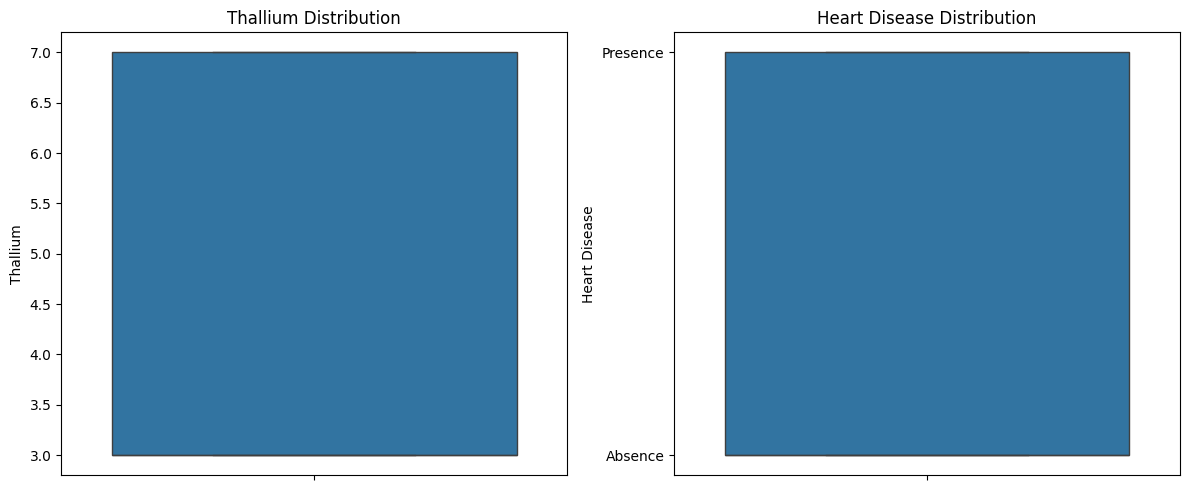

In [ ]:
plt.figure(figsize = (12, 5))

plt.subplot(1,2,1)
sns.boxplot(hd['Thallium'])
plt.title("Thallium Distribution")
plt.ylabel("Thallium")

plt.subplot(1,2,2)
sns.boxplot(hd['Heart Disease'])
plt.title("Heart Disease Distribution")
plt.ylabel("Heart Disease")
plt.tight_layout()

<Axes: ylabel='Cholesterol'>

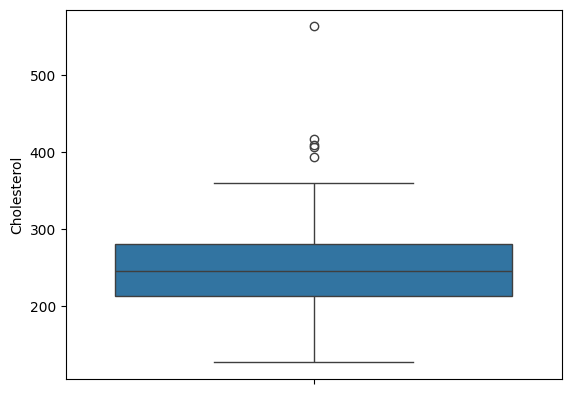

In [ ]:
sns.boxplot(hd['Cholesterol'])

In [ ]:
hd['Cholesterol'].skew()

1.1837208885656836

<Axes: ylabel='Cholesterol'>

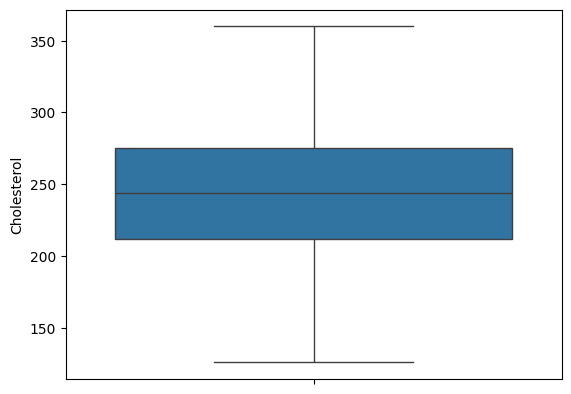

In [ ]:
#IQR Method for deleting the outliers in Cholesterol variable
def drop_outliers(hd,Cholesterol):
  IQR = 1.5 * (np.percentile(hd['Cholesterol'], 75) - np.percentile(hd['Cholesterol'],25))
  hd.drop(hd[hd['Cholesterol'] > (IQR + np.percentile(hd['Cholesterol'], 75))].index, inplace = True)
  hd.drop(hd[hd['Cholesterol'] < (np.percentile(hd['Cholesterol'], 25) - IQR)].index, inplace = True)
drop_outliers(hd,'Cholesterol')
sns.boxplot(hd['Cholesterol'])

In [ ]:
hd['Cholesterol'].skew()

0.10914766288712821

In [ ]:
#IQR value for Cholesterol Variable
IQR = 1.5 * (np.percentile(hd['Cholesterol'], 75) - np.percentile(hd['Cholesterol'],25))
IQR

94.5

<Axes: ylabel='BP'>

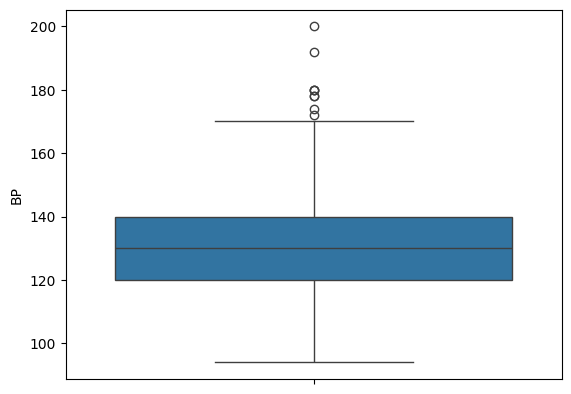

In [ ]:
sns.boxplot(hd['BP'])

In [ ]:
hd['BP'].skew()

0.7376530913164504

In [ ]:
#quantile values of BP
percentile25 = hd['BP'].quantile(0.25)
percentile75 = hd['BP'].quantile(0.75)

In [ ]:
percentile25, percentile75

(120.0, 140.0)

In [ ]:
#IQR value
IQR = percentile75 - percentile25
IQR

20.0

In [ ]:
#lowerlimit and upper limit for BP
lowerlimit = percentile25 - 1.5 * IQR
upperlimit = percentile75 + 1.5 * IQR
lowerlimit, upperlimit

(90.0, 170.0)

<Axes: ylabel='BP'>

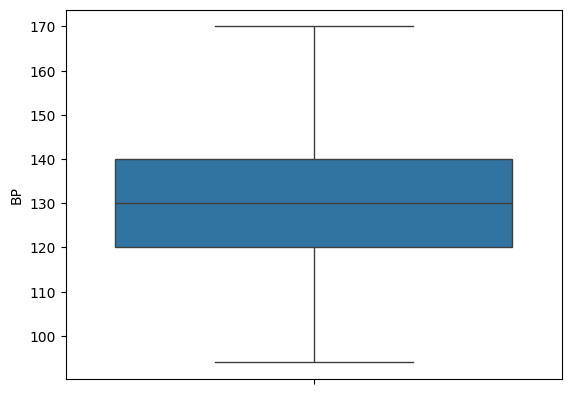

In [ ]:
#IQR method for deleting the outliers in BP Variable
hd['BP'] = np.where(
    hd['BP'] > upperlimit, upperlimit, np.where(
        hd['BP'] < lowerlimit, lowerlimit, hd['BP']
    )
)
sns.boxplot(hd['BP'])

In [ ]:
hd['BP'].skew()

0.38414522747507124

<Axes: ylabel='Chest pain type'>

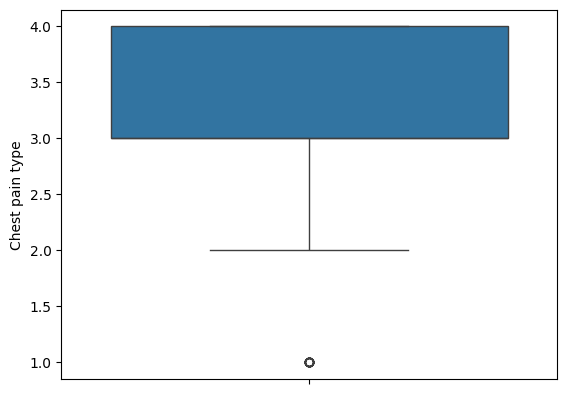

In [ ]:
sns.boxplot(hd['Chest pain type'])

In [ ]:
#quantile values for Chest pain type variable
cp25 = hd['Chest pain type'].quantile(0.25)
cp75 = hd['Chest pain type'].quantile(0.75)
cp25, cp75

(3.0, 4.0)

In [ ]:
#IQR vaue for Chest pain type variable
IQR_chest_Pain_Type = cp75 - cp25
IQR_chest_Pain_Type

1.0

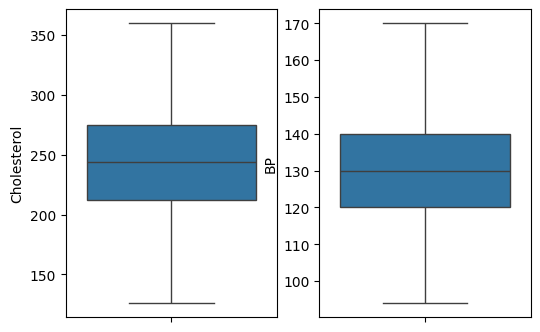

In [ ]:
#Boxplot after handling the outliers
plt.figure(figsize=(6, 4))
plt.subplot(1,2,1)
sns.boxplot(hd['Cholesterol'])

plt.subplot(1,2,2)
sns.boxplot(hd['BP'])
plt.show()



<Axes: xlabel='Age', ylabel='Cholesterol'>

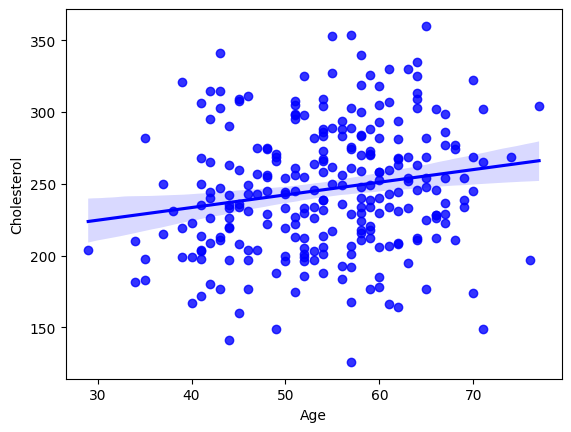

In [ ]:
sns.regplot(x = 'Age', y ='Cholesterol', data = hd, color = 'blue')

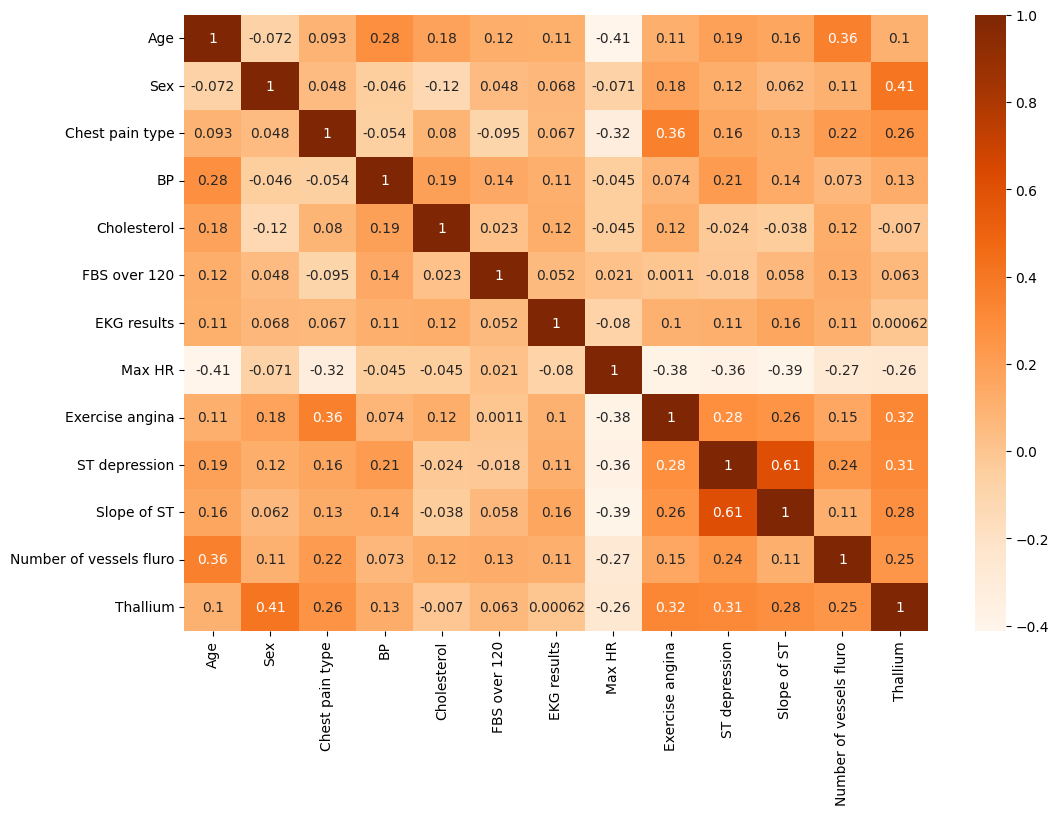

In [ ]:
plt.figure(figsize = (12, 8))
corr_matrix = hd.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'Oranges')
plt.show()

In [ ]:
hd['Heart Disease'] = hd['Heart Disease'].replace({'Presence':1, "Absence":0})

In [ ]:
hd['Heart Disease'].value_counts()

0    147
1    118
Name: Heart Disease, dtype: int64

In [ ]:
x = hd.drop('Heart Disease', axis = 1)
y = hd[['Heart Disease']]

In [ ]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mms  = MinMaxScaler()
num_columns = mms.fit_transform(hd)
num_columns

array([[0.85416667, 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.58333333, 1.        , 0.33333333, ..., 0.        , 1.        ,
        1.        ],
       [0.72916667, 1.        , 1.        , ..., 0.33333333, 1.        ,
        0.        ],
       ...,
       [0.5625    , 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 1.        , 1.        , ..., 0.        , 0.75      ,
        0.        ],
       [0.79166667, 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ]])

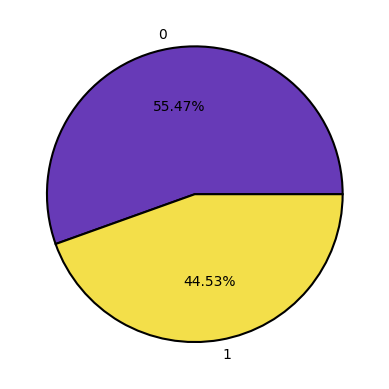

In [ ]:
HeartDisease = hd['Heart Disease'].value_counts()
plt.pie(HeartDisease, labels = HeartDisease.index, autopct = "%.2f%%", colors = ['#673ab7','#f3df4a'], wedgeprops = {'linewidth':1.5, 'edgecolor':'Black'})
plt.show()

1    147
0    147
Name: Heart Disease, dtype: int64


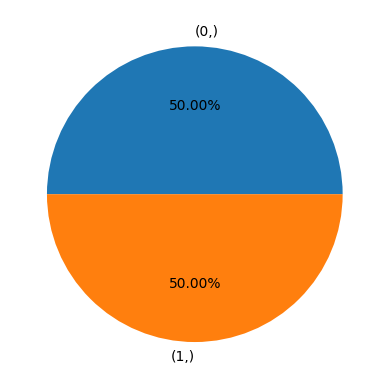

In [ ]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train_sm, y_train_sm = sm.fit_resample(x, y)
print(y_train_sm['Heart Disease'].value_counts())
ax = y_train_sm.value_counts().plot.pie(autopct = "%.2f%%")

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_sm,y_train_sm)

LogisticRegression()

In [ ]:
print("Train Score: {}".format(lr.score(x_train_sm, y_train_sm)))
print("Test Score: {}".format(lr.score(x_test, y_test)))

Train Score: 0.8537414965986394
Test Score: 0.8867924528301887


In [ ]:
x_train.head(1)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
63,60,0,1,150.0,240,0,0,171,0,0.9,1,0,3


In [ ]:
lr.predict([[75, 0, 3, 200, 450, 1, 2, 195, 0, 0, 2, 2, 8  ]])

array([1])

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
Accuracy_Score = accuracy_score(y_pred, y_test)
print("The Accuracy Score for Logistic Regression is {}".format(Accuracy_Score))

The Accuracy Score for Logistic Regression is 0.8867924528301887


ROC-AUC Score: 0.9574780058651026


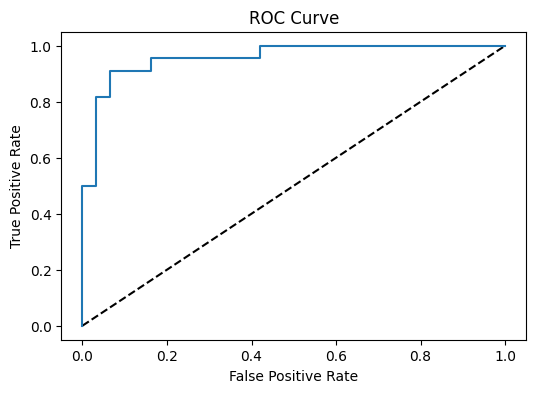

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc = roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1])
print('ROC-AUC Score:', roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:, 1])
fig = plt.figure(figsize=(6, 4))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal 50% line
plt.plot(fpr, tpr)  # Plot the FPR and TPR achieved by the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'gini',n_estimators = 80, max_depth = 6, max_features = 6, random_state = 40)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, max_features=6, n_estimators=80,
                       random_state=40)

In [ ]:
rfc.score(x_train_sm, y_train_sm)

0.9455782312925171

In [ ]:
rfc.score(x_test, y_test)

0.8490566037735849

In [ ]:
y_pred = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_pred, y_test)
print("Accuracy Score For Random Forest Classifier {}".format(Accuracy))

Accuracy Score For Random Forest Classifier 0.8490566037735849


ROC-AUC Score: 0.9046920821114369


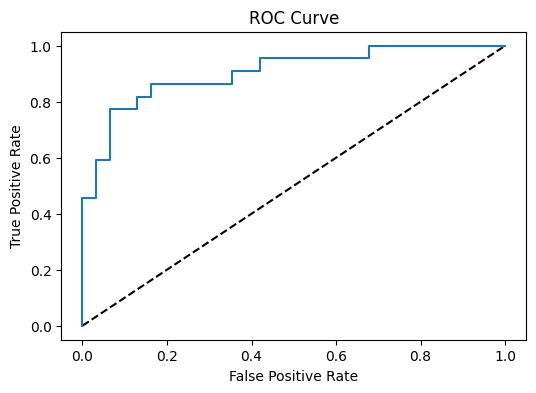

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc = roc_auc_score(y_test, rfc.predict_proba(x_test)[:, 1])
print('ROC-AUC Score:', roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(x_test)[:, 1])
fig = plt.figure(figsize=(6, 4))
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal 50% line
plt.plot(fpr, tpr)  # Plot the FPR and TPR achieved by the model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()